<a href="https://colab.research.google.com/github/joamilab/AnalisadorFotos-ImersaoAluraGemini/blob/main/Desafio_Imers%C3%A3o_Alura_Gemini_Analisar_fotos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Imersão Alura Gemini - Analisador de fotos para perfis profissionais

Este projeto tem o objetivo de fornecer uma IA treinada (com Gemini) para analisar se uma determinada foto (fornecida pelo usuário) é adequada para usar em um perfil profissional.

## Instalar pacotes

In [43]:
!pip install -q -U langchain_core langchain_google_genai

## Configurações

Adicionar a chave de API do Gemini.

In [44]:
import os
os.environ['GOOGLE_API_KEY'] = 'TODO';

if os.environ["GOOGLE_API_KEY"] == 'TODO':
    print({ "error": '''
        To get started, get an GOOGLE_API_KEY and enter it in the first step
    '''.replace('\n', '') })

# Obter imagem

Necessário adicionar a foto que será analisada por um dos caminhos descritos abaixo:
* Opção 1: Adicionar via upload no ambiente de execucação (na barra do lado esquerdo - Fazer upload para o armazenamento da sessão)



* Opção 2: Adicionar foto no Google Drive e em seguida conectar o Google Drive e o Google Colab (na barra do lado esquerdo - Montar Drive)

In [45]:
def set_image_rescaling_factor(width, height):
  '''
    Define um fator para redefinir a escala da foto. O tamanho da foto será diminuído.

    Parameters:
      width (float): Largura da foto
      height (float): Altura da foto

    Return:
      rescaling_factor (int): Fator pelo qual altura e largura serão divididos
  '''

  rescaling_factor = 1

  if width >= 4000 or height >= 4000:
    rescaling_factor = 8
  elif width >= 1000 or height >= 1000:
    rescaling_factor = 4
  else:
    rescaling_factor = 2

  return rescaling_factor

Copiar o caminho da foto para fornecer ao programa.
Exemplo de caminho: /content/foto-1.png

As fotos usadas de exemplo foram:
* [foto-1 (bom exemplo)](https://pixomatic.us/blog/social-media/tips-professional-profile-picture-linkedin/)

* [foto-2 (mau exemplo)](https://unsplash.com/pt-br/fotografias/homem-na-montanha-do-campo-de-neve-durante-o-dia-zXjnnbk5EUU?utm_content=creditShareLink&utm_medium=referral&utm_source=unsplash)

In [46]:
from PIL import Image

img_path = input('Digite o caminho da imagem: ')

img = Image.open(img_path)

Digite o caminho da imagem: /content/foto-1.png


## Parâmetros do modelo

In [47]:
model_name = "gemini-pro-vision"

safety_settings={
    'HATE': 'BLOCK_MOST',
    'HARASSMENT': 'BLOCK_MOST',
    'SEXUAL' : 'BLOCK_MOST',
    'DANGEROUS' : 'BLOCK_MOST'
    }

temperature = 0.6

max_out_tokens = 8192

## Definição do prompt

In [48]:
prompt = '''Analisar se esta foto é adequada para usar em um perfil profissional.
            Se a foto for adequada, enumerar os pontos fortes, em tópicos.
            Se a foto não for adequada, enumerar os pontos fracos, em tópicos.
            Enumerar até 5 dicas para uma boa foto profissional, em tópicos.
            '''

## Executar prompt

In [49]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from IPython.display import Markdown, clear_output, display


model = ChatGoogleGenerativeAI(model=model_name,
                               temperature=temperature,
                               safetySettings=safety_settings,
                               maxOutputTokens=max_out_tokens)

message = HumanMessage(content=[
    { 'type': 'text', 'text': prompt },
    { 'type': 'image_url', 'image_url': img }
])

response = model.stream([message])

## Mostrar resposta

* Análise da foto
* Foto em tamanho reduzido

 A foto é adequada para uso em perfil profissional.

Pontos fortes:

* A foto é recente e mostra a pessoa com uma aparência profissional.
* A pessoa está sorrindo e olhando diretamente para a câmera, o que transmite uma imagem de confiança e abertura.
* A foto é bem iluminada e o fundo é neutro, o que não distrai a atenção da pessoa.
* A pessoa está vestindo uma roupa profissional, o que reforça a imagem de seriedade e competência.

Dicas para uma boa foto profissional:

* Use uma roupa profissional e certifique-se de que esteja bem passada e limpa.
* Penteie o cabelo e faça a barba (se for homem).
* Sorria e olhe diretamente para a câmera.
* Certifique-se de que a foto esteja bem iluminada e o fundo seja neutro.
* Evite tirar fotos com muita sombra no rosto.

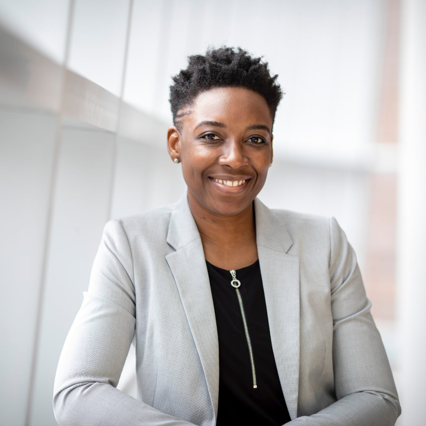

In [50]:
buffer = []
for chunk in response:
    buffer.append(chunk.content)
    clear_output()
    display(Markdown(''.join(buffer)))

print()
#Show image
img_w, img_h = img.size
rescaling_factor = set_image_rescaling_factor(img_w, img_h)
img.resize((int(img_w/rescaling_factor), int(img_h/rescaling_factor)))